In [ ]:
install.packages("twitteR", repos='http://cran.us.r-project.org')


In [4]:
library(twitteR)
setup_twitter_oauth("6VOXGcI9RcZu6TgkZR8z7icLI", "L2txGKiWqSctX6H7zw5BjwRQumXs3NB1rKTHXsE6vbT9ok34V3", "1155945294-a4Ds2mz3a3JgA3Sh232GenlpU6Fd0ZJxWwuAIkF", "WVQBUB0HESaNelGyl2ymELlkUKHpOM0WnSLfjHki2s3ts")

[1] "Using direct authentication"


In [13]:
var <- "Falcons"

In [2]:
tweets<-searchTwitter(var, n=20000)

[1] "Rate limited .... blocking for a minute and retrying up to 119 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 118 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 117 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 116 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 115 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 114 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 113 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 112 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 111 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 110 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 109 times ..."


In [3]:
dataFrame <- twListToDF(tweets)
write.csv(dataFrame, file="Falcons.csv")
userNames <- lookupUsers(dataFrame$screenName)
userFrame <- twListToDF(userNames)
write.csv(userFrame, file="userFrame.csv")

In [4]:
install.packages("ggmap", repos='http://cran.us.r-project.org')
library(ggmap)

Installing package into 'C:/Users/Akash Yeleswarapu/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Akash Yeleswarapu\AppData\Local\Temp\Rtmp4ghYvh\downloaded_packages


Loading required package: ggplot2


In [5]:
allLocations <- geocode(userFrame$location[1:2480])

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Beverly%20Hills,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=washington,%20d.c.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pretoria&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Spruce%20Pine,NC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fairfield,%20California&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ohio,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20TX&sensor=false
Information 

In [6]:
locationsDf <- twListToDF(allLocations)

ERROR: Error in twListToDF(allLocations): Elements of twList are not of an appropriate class


In [7]:
write.csv(allLocations, file="allLocations.csv")

In [9]:
allLocations <- na.omit(allLocations)

In [11]:
N

In [58]:
library(data.table)
locationFrame <- data.table(allLocations)[, .N, by=.(lon, lat)]

In [65]:
locationFrame

lon,lat,N
-118.2436849,34.05223,13
-118.4003563,34.07362,1
-77.0368707,38.90719,8
28.2292712,-25.74787,1
-84.3879824,33.74900,89
-82.0645611,35.91540,1
-122.0399663,38.24936,2
-82.9071230,40.41729,5
-95.3698028,29.76043,10
-105.1228655,52.20198,1


In [5]:
library('ggplot2')
library(ggmap)

In [15]:
get_amp('usa')

ERROR: Error in eval(expr, envir, enclos): could not find function "get_amp"


In [6]:
map <- get_map(location = 'usa' , zoom = 4)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=usa&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=usa&sensor=false


In [7]:
final_map <- ggmap(map) + geom_point(data = locationFrame, aes(x = lon, y = lat, size = N), col = "black", alpha = 0.8)

ERROR: Error in fortify(data): object 'locationFrame' not found


In [ ]:
# locationFrame_total <- rbind(locationFrame, locationFrame1)
# library(data.table)
locationFrame_total <- data.table(locationFrame_total)[, .N, by=.(lon, lat)]

In [8]:
allLocations <- read.csv("allLocations.csv")
allLocations <- na.omit(allLocations)

# location <- as.character(location)

In [9]:
library(data.table)
locationFrame <- data.table(allLocations)[, .N, by=.(lon, lat)]

In [10]:
locationFrame

lon,lat,N
-118.2436849,34.05223,13
-118.4003563,34.07362,1
-77.0368707,38.90719,8
28.2292712,-25.74787,1
-84.3879824,33.74900,89
-82.0645611,35.91540,1
-122.0399663,38.24936,2
-82.9071230,40.41729,5
-95.3698028,29.76043,10
-105.1228655,52.20198,1


In [11]:
final_map <- ggmap(map) + geom_point(data = locationFrame, aes(x = lon, y = lat, size = N), col = "black", alpha = 0.8)

Warning message:
"Removed 209 rows containing missing values (geom_point)."

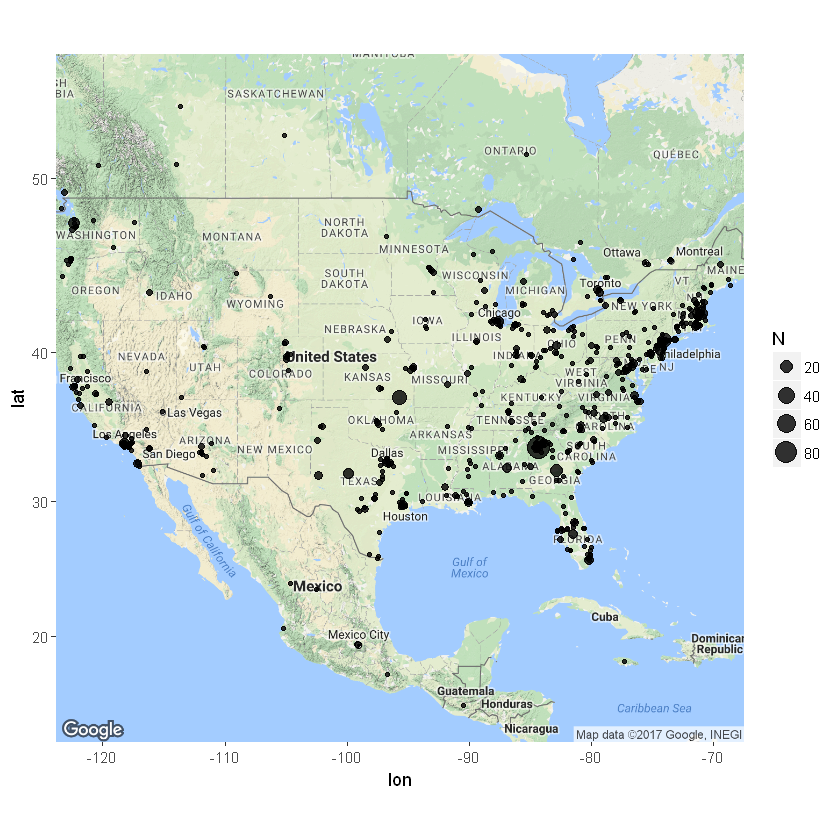

In [12]:
final_map

In [14]:
userFrame <- read.csv("userFrame.csv")
location <- userFrame$location
location <- as.character(location)

In [15]:
allLocations1 <- geocode(location[2500:4500])

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tampa,%20Florida&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arizona,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Land%20Of%20Lombardi&sensor=false
Warning message:
"geocode failed with status ZERO_RESULTS, location = "The Land Of Lombardi""Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Look%20Behind%20you&sensor=false
Warning message:
"geocode failed with status ZERO_RESULTS, location = "Look Behind you""Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Lost%20Valley%20....&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Connecticut,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bremerton,%20WA&sensor=false
Information from URL : http

In [18]:
allLocations1 <- na.omit(allLocations1)
write.csv(allLocations1, file="filteredLocations1.csv")

In [21]:
library(data.table)
locationFrame <- data.table(allLocations)[, .N, by=.(lon, lat)]
locationFrame1 <- data.table(allLocations1)[, .N, by=.(lon, lat)]
locationFrame_total <- rbind(locationFrame, locationFrame1)

In [27]:
colnames(locationFrame_total) <- c("lon", "lat", "size")

In [28]:
locationFrame_total

lon,lat,size
-118.2436849,34.05223,13
-118.4003563,34.07362,1
-77.0368707,38.90719,8
28.2292712,-25.74787,1
-84.3879824,33.74900,89
-82.0645611,35.91540,1
-122.0399663,38.24936,2
-82.9071230,40.41729,5
-95.3698028,29.76043,10
-105.1228655,52.20198,1


In [23]:
map <- get_map(location = 'usa' , zoom = 4)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=usa&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=usa&sensor=false


In [29]:
final_map <- ggmap(map) + geom_point(data = locationFrame_total, aes(x = lon, y = lat, size = size), col = "black", alpha = 0.8)

Warning message:
"Removed 298 rows containing missing values (geom_point)."

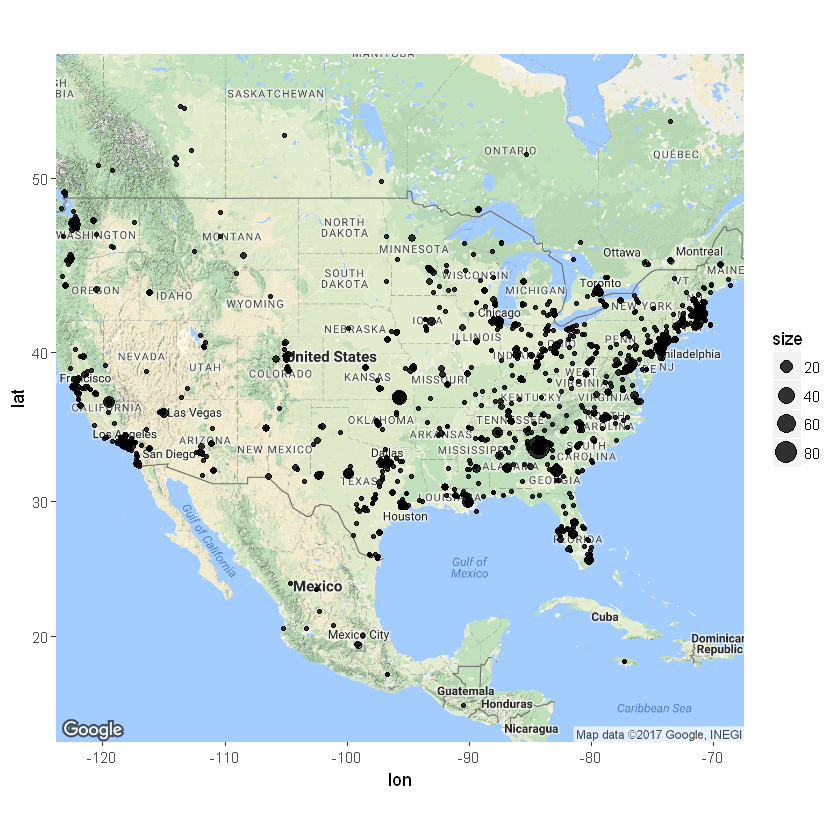

In [30]:
final_map